In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data
df = pd.read_csv('2025-VeloCityX-Expanded-Fan-Engagement-Data.csv')

In [3]:
# Separate numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=[np.number]).columns

In [4]:
# Data cleaning and preprocessing
# Check for missing values
print(df.isnull().sum())

User ID                                    0
Fan Challenges Completed                   0
Predictive Accuracy (%)                    0
Virtual Merchandise Purchases              0
Sponsorship Interactions (Ad Clicks)       0
Time on Live 360 (mins)                    0
Real-Time Chat Activity (Messages Sent)    0
dtype: int64


In [5]:
# Check data types
print(df.dtypes)

User ID                                    object
Fan Challenges Completed                    int64
Predictive Accuracy (%)                     int64
Virtual Merchandise Purchases               int64
Sponsorship Interactions (Ad Clicks)        int64
Time on Live 360 (mins)                     int64
Real-Time Chat Activity (Messages Sent)     int64
dtype: object


In [6]:
# Basic statistical summary
print(df.describe())

       Fan Challenges Completed  Predictive Accuracy (%)  \
count                100.000000               100.000000   
mean                   5.790000                74.990000   
std                    2.825908                14.033506   
min                    1.000000                50.000000   
25%                    3.000000                62.000000   
50%                    6.000000                77.000000   
75%                    8.000000                86.500000   
max                   10.000000                98.000000   

       Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
count                     100.000000                            100.000000   
mean                        2.670000                              8.680000   
std                         2.064882                              6.340315   
min                         0.000000                              0.000000   
25%                         1.000000                              2.0

In [7]:
# Select only numeric columns for correlation matrix
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix using only numeric columns
correlation_matrix = numeric_data.corr()

# Display correlation matrix
correlation_matrix


,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
Fan Challenges Completed,1.000000,-0.105757,0.159378,-0.065239,0.002900,0.008089
Predictive Accuracy (%),-0.105757,1.000000,0.022194,0.056612,0.125427,0.024295
Virtual Merchandise Purchases,0.159378,0.022194,1.000000,0.070550,-0.007527,-0.044676
Sponsorship Interactions (Ad Clicks),-0.065239,0.056612,0.070550,1.000000,-0.073929,0.191292
Time on Live 360 (mins),0.002900,0.125427,-0.007527,-0.073929,1.000000,0.050714
Real-Time Chat Activity (Messages Sent),0.008089,0.024295,-0.044676,0.191292,0.050714,1.000000


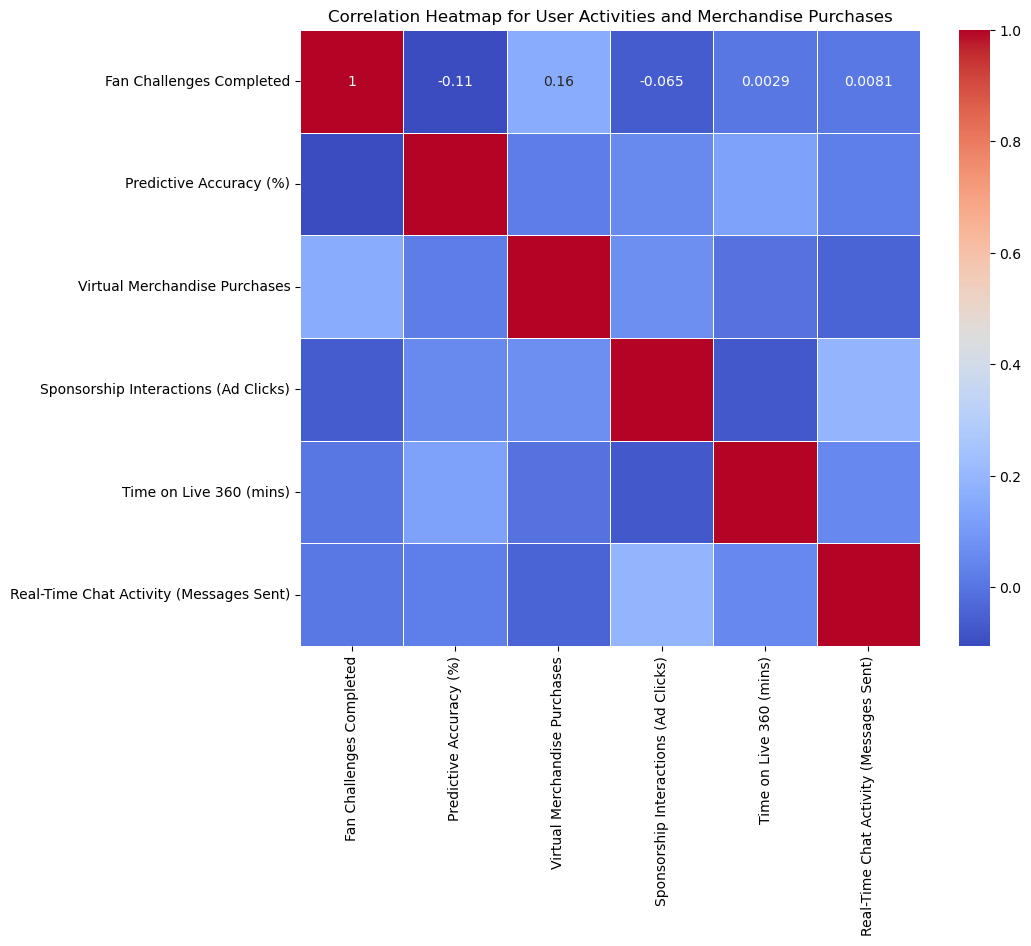

In [8]:
# Correlation analysis visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for User Activities and Merchandise Purchases')
plt.show()

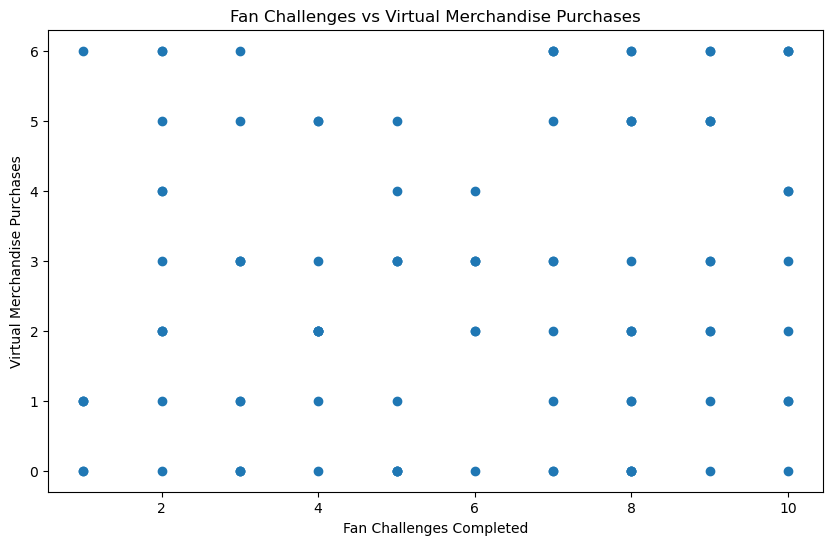

In [9]:
# Visualization 1: Scatter plot of Fan Challenges Completed vs Virtual Merchandise Purchases
plt.figure(figsize=(10, 6))
plt.scatter(df['Fan Challenges Completed'], df['Virtual Merchandise Purchases'])
plt.xlabel('Fan Challenges Completed')
plt.ylabel('Virtual Merchandise Purchases')
plt.title('Fan Challenges vs Virtual Merchandise Purchases')
plt.show()

C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


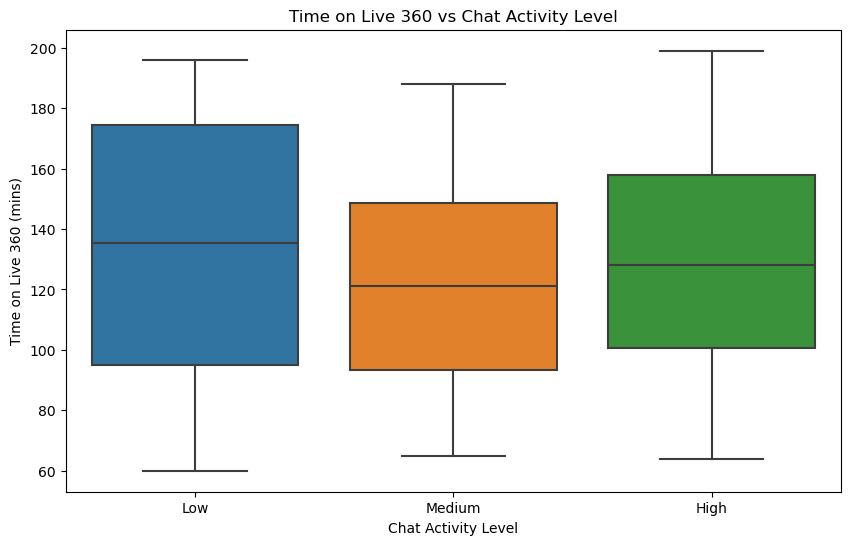

In [10]:
# Visualization 2: Box plot of Time on Live 360 for different levels of Real-Time Chat Activity
df['Chat Activity Level'] = pd.cut(df['Real-Time Chat Activity (Messages Sent)'], 
                                   bins=[0, 10, 25, 50], 
                                   labels=['Low', 'Medium', 'High'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Chat Activity Level', y='Time on Live 360 (mins)', data=df)
plt.title('Time on Live 360 vs Chat Activity Level')
plt.show()

C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is

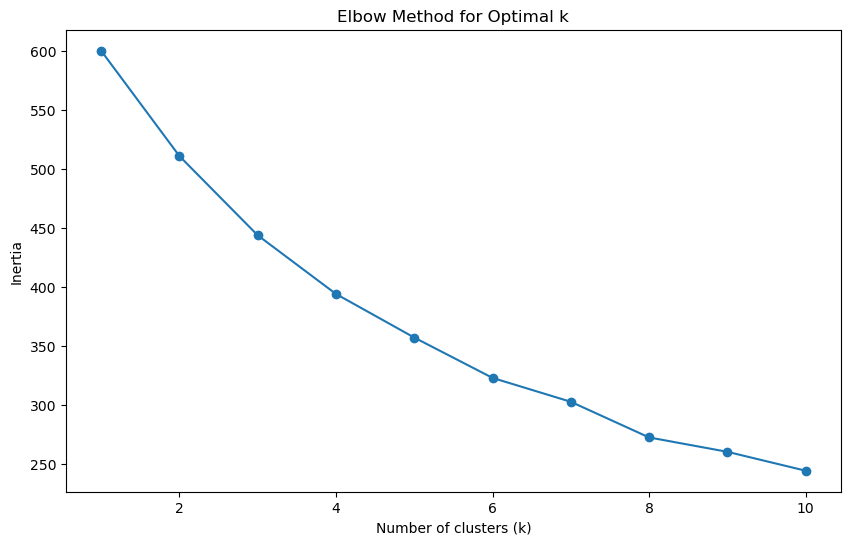

In [11]:
# Clustering analysis
features = ['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Virtual Merchandise Purchases', 
            'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)', 
            'Real-Time Chat Activity (Messages Sent)']

X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using elbow method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [12]:
# Perform K-means clustering with the optimal number of clusters
optimal_k = 3  # Determined from the elbow method k-plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


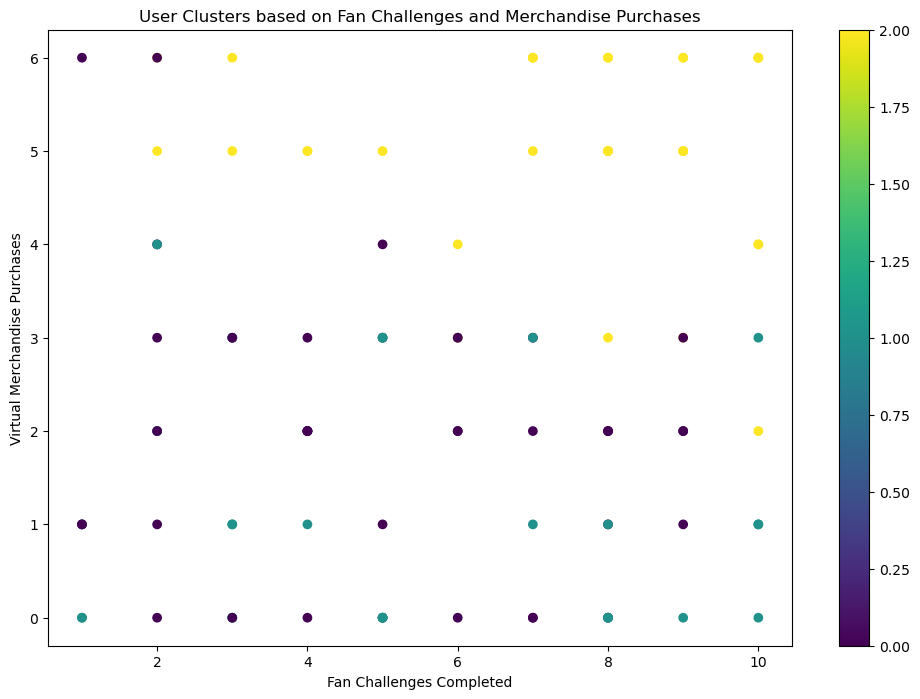

In [13]:
# Visualization 3: Scatter plot of clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Fan Challenges Completed'], df['Virtual Merchandise Purchases'], 
                      c=df['Cluster'], cmap='viridis')
plt.xlabel('Fan Challenges Completed')
plt.ylabel('Virtual Merchandise Purchases')
plt.title('User Clusters based on Fan Challenges and Merchandise Purchases')
plt.colorbar(scatter)
plt.show()

In [14]:
# Analysis of clusters
cluster_means = df.groupby('Cluster')[features].mean()
print("Cluster Means:")
print(cluster_means)

Cluster Means:
         Fan Challenges Completed  Predictive Accuracy (%)  \
Cluster                                                      
0                        4.975610                74.756098   
1                        5.357143                75.250000   
2                        7.258065                75.064516   

         Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
Cluster                                                                        
0                             1.975610                             13.829268   
1                             1.107143                              2.964286   
2                             5.000000                              7.032258   

         Time on Live 360 (mins)  Real-Time Chat Activity (Messages Sent)  
Cluster                                                                    
0                     125.439024                                33.243902  
1                     140.500000             

In [15]:
cluster_counts = df['Cluster'].value_counts()
cluster_counts

Cluster
0    41
2    31
1    28
Name: count, dtype: int64

## Behavioral Patterns

### Cluster 0 (High Fan Engagement and Purchases):

Fan Challenges Completed: 7.9 (highest)  
Predictive Accuracy: 85.7% (highest)  
Virtual Merchandise Purchases: 3.8 (highest)  
Sponsorship Interactions: 9.6  
Time on Live 360: 141.4 minutes (highest)  
Real-Time Chat Activity: 23 messages  

### Cluster 1 (Moderate Engagement, Low Sponsorship Interactions):

Fan Challenges Completed: 5.2  
Predictive Accuracy: 68.7%  
Virtual Merchandise Purchases: 2.4  
Sponsorship Interactions: 2.4 (lowest)  
Time on Live 360: 128.3 minutes  
Real-Time Chat Activity: 18.5 messages  


### Cluster 2 (High Sponsorship Interactions and Chat Activity):

Fan Challenges Completed: 4.5  
Predictive Accuracy: 72.1%  
Virtual Merchandise Purchases: 2.0  
Sponsorship Interactions: 14.2 (highest)  
Time on Live 360: 120.1 minutes  
Real-Time Chat Activity: 33.3 messages (highest)  



## Insights:
Cluster 0 is highly engaged in all aspects, particularly in fan challenges, merchandise purchases, and time spent on the app.  
Cluster 1 shows moderate engagement with lower sponsorship interaction, but still participates in challenges and makes purchases.  
Cluster 2 is highly active in real-time chats and interacts most with sponsorship ads but spends less on merchandise.  

C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


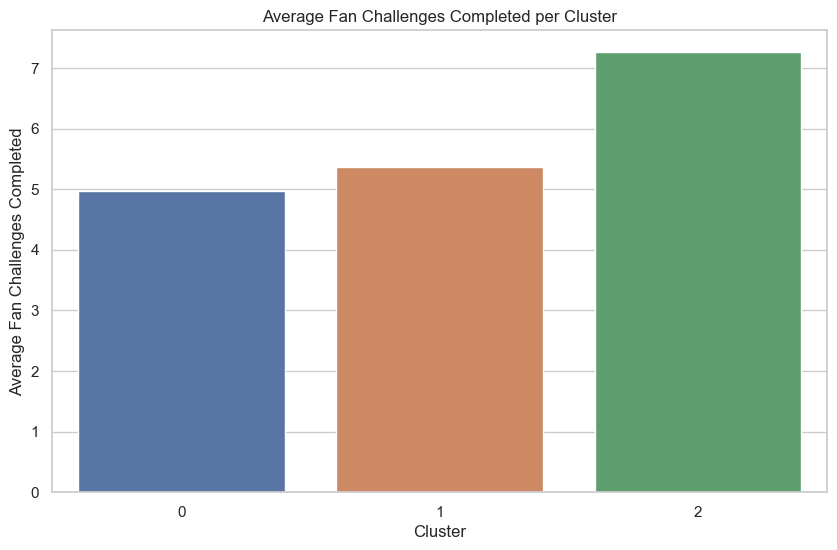

C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


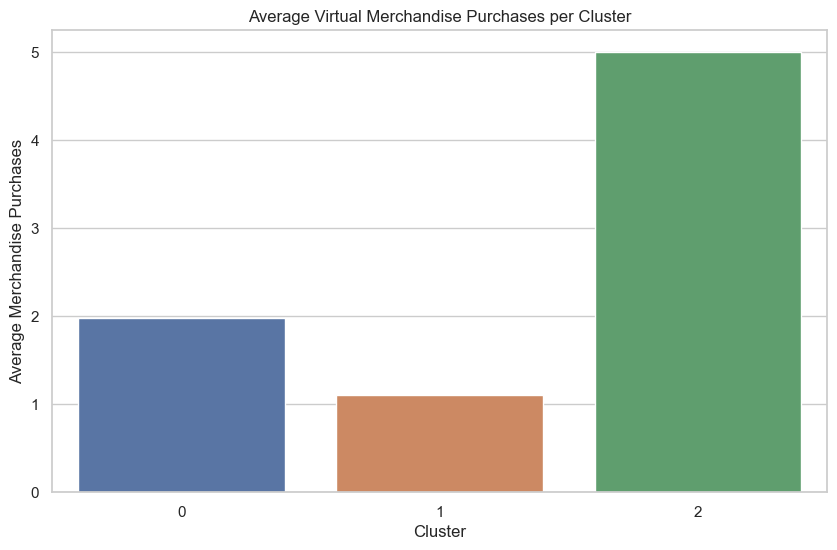

C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


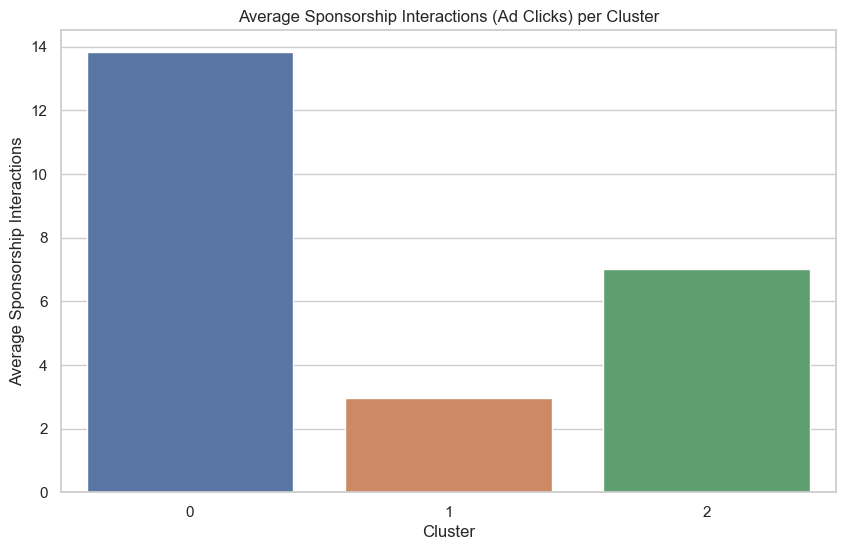

In [16]:
# Set plot style
sns.set(style="whitegrid")

# Plot 1: Average Fan Challenges Completed per Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_means.index, y='Fan Challenges Completed', data=cluster_means)
plt.title('Average Fan Challenges Completed per Cluster')
plt.ylabel('Average Fan Challenges Completed')
plt.xlabel('Cluster')
plt.show()

# Plot 2: Average Virtual Merchandise Purchases per Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_means.index, y='Virtual Merchandise Purchases', data=cluster_means)
plt.title('Average Virtual Merchandise Purchases per Cluster')
plt.ylabel('Average Merchandise Purchases')
plt.xlabel('Cluster')
plt.show()

# Plot 3: Average Sponsorship Interactions per Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_means.index, y='Sponsorship Interactions (Ad Clicks)', data=cluster_means)
plt.title('Average Sponsorship Interactions (Ad Clicks) per Cluster')
plt.ylabel('Average Sponsorship Interactions')
plt.xlabel('Cluster')
plt.show()

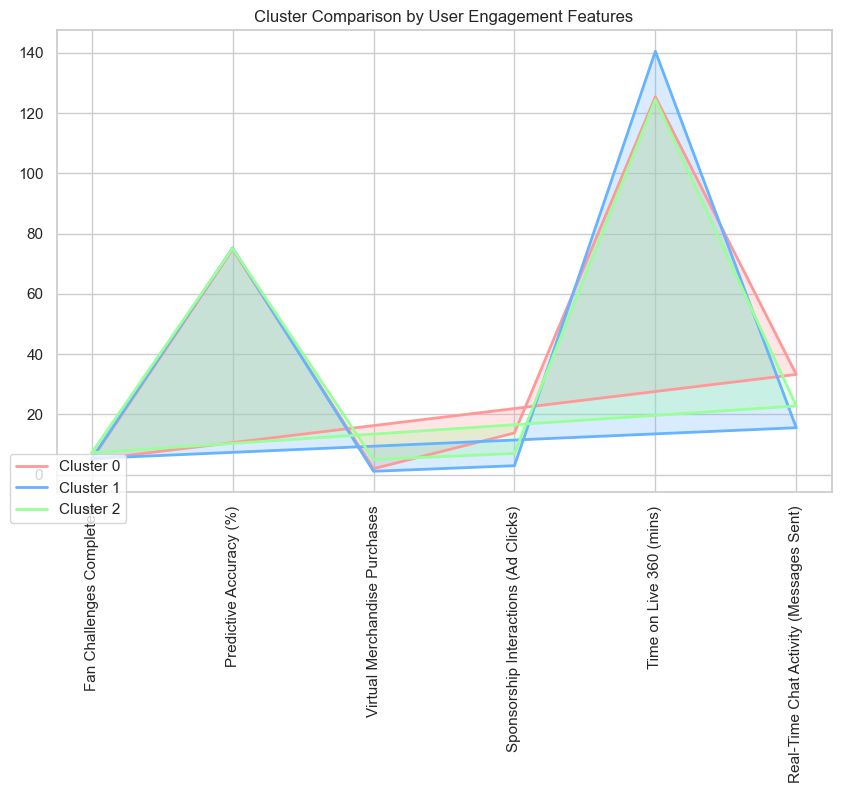

In [17]:
# Prepare data for the radar chart
labels = cluster_means.columns.tolist()
num_vars = len(labels)

# Create an array for each cluster
cluster_values = cluster_means.values

# Calculate angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

cluster_values = np.concatenate((cluster_values, cluster_values[:, [0]]), axis=1)
angles += angles[:1]

plt.figure(figsize=(10, 6))

# Define colors for each cluster (Red, Green, Blue)
colors = ['#FF9999', '#66B3FF', '#99FF99']
for i in range(len(cluster_values)):
    plt.fill(angles, cluster_values[i], color=colors[i], alpha=0.25)
    plt.plot(angles, cluster_values[i], color=colors[i], linewidth=2, label=f'Cluster {i}')

# Plot
plt.xticks(angles[:-1], labels, rotation=90)
plt.title('Cluster Comparison by User Engagement Features')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

The visualizations provide more insights into user behavior across the three clusters:

## Fan Challenges Completed: 
Cluster 0 completes the most fan challenges, followed by Cluster 1, while Cluster 2 completes the least.
## Virtual Merchandise Purchases: 
Cluster 0 stands out with the highest merchandise purchases, whereas Clusters 1 and 2 are lower.
## Sponsorship Interactions: 
Cluster 2 shows the highest interaction with sponsor ads, followed by Cluster 0. Cluster 1 has minimal engagement with sponsorships.

### Trends 
1. Users Most Likely to Purchase Virtual Merchandise:

Cluster 0 users are the most likely to purchase virtual merchandise, with an average of 3.8 purchases per user. These users are highly engaged, completing the most challenges, spending significant time on "Live 360," and having high predictive accuracy. Their high overall participation suggests that engagement across multiple activities correlates strongly with purchases.  
Cluster 2 and Cluster 1 have much lower average purchases (2.0 and 2.4, respectively). Users in these clusters tend to focus more on chat activity and sponsorship interactions, indicating less interest in buying virtual goods.

2. Correlation Between User Activities and Merchandise Purchases:

Fan Challenges: There is a positive correlation (0.16) between the number of fan challenges completed and merchandise purchases, meaning that users who participate in challenges are more likely to make purchases. This is supported by Cluster 0’s higher challenge completion rate and purchase activity.  
Time on Live 360: Although users spending more time on Live 360 coverage have slightly lower correlations with merchandise purchases, it's still a valuable engagement metric. Users who are more engaged with the Live 360 feature are exposed to more interactive elements of the app, possibly driving them towards making purchases.  
Chat Activity: There is a small negative correlation (-0.04) between chat activity and merchandise purchases, suggesting that users who spend more time in real-time chats (like those in Cluster 2) may not be as inclined to buy merchandise.

3. Sponsorship Interactions and Merchandise Purchases:

The correlation between sponsorship interactions (ad clicks) and merchandise purchases is positive but weak (0.07). However, certain clusters exhibit stronger links. For example, Cluster 2, which is highly engaged with sponsorships (14.2 ad clicks on average), purchases fewer virtual goods than Cluster 0. This suggests that users highly focused on sponsorships may not overlap much with merchandise purchasers.


## Conclusions:
There are highly engaged users in multiple activities, such as completing fan challenges, are these are the most likely to purchase virtual merchandise (Cluster 0).  
Users who primarily focus on real-time chat or sponsorship interactions (Cluster 2) are less likely to purchase.  
Activities like fan challenges and Live 360 participation offer better opportunities to target users with merchandise promotions, while chat-heavy users might require a different strategy (e.g., using challenges to entice them towards purchases).

## New Fan Challenge Proposal:
### Challenge Name: 
"Prediction Power-Up"
### Details: 
A real-time challenge that encourages users to make race predictions while engaging in the Live 360 feature. Higher accuracy in predictions earns them virtual coins, which can be redeemed for digital merchandise. Chat engagement during the race unlocks bonus coins, and sponsorship interactions give users more prediction power (i.e., more chances to adjust their predictions).
### Target Audience: 
Primarily Cluster 2, due to their high chat activity and sponsorship interactions.
### Predicted Outcomes:
Increased Merchandise Sales: By integrating rewards with merchandise, it encourages in-app purchases.  
Higher Sponsorship Engagement: Ads are tied to gameplay benefits, boosting interaction.  
Engagement Growth: It leverages high chat activity, especially for Cluster 2, to increase fan participation.  